* Submit the assignment with roll_number as *roll_number*.ipynb file.

# Task-1 : Implement VGG16 on Food101 dataset.
Your first task would be to implement the VGG16 architecture model class and train a classification model on the Food101 dataset using the above architecture. The details of the dataset are given below.  

### 1.1 Import packages
Some packages are imported. However, you would need to import any other package that is required in the implementation that you feel is required. But do keep in mind, your model shouldn't be imported. It has to be implemented using the basic convolution layers.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set default style of plt
plt.style.use('seaborn')


/tmp/ipykernel_26/2857752434.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1.2. Dataset
The Food-101 is a challenging data set of 101 food categories with 101,000 images. All images were rescaled to have a maximum side length of 512 pixels. Implementing the below cell will allow you to download the dataset into your colab directory under ```/data/food-101```.
Inside the directory you would find the information about the dataset and also a ReadMe.txt file.

Now, the image size of the dataset is ```(512,512,3)```. However, the model expects the image to be of the size ```(224,224,3)```. Now using the transforms method, write a composed transformation where you implement the resize as well as convert to tensor function. Do some basic preprocessing as well, Normalisation, Standardization etc. \
Hint : use the ``` transform.Compose() ``` method.




In [2]:
### YOUR CODE STARTS HERE ###

transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
])

### YOUR CODE ENDS HERE ###

In [3]:
# Setup training data
train_data = datasets.Food101(
    root="data",
    split="train", # get training data
    download=True,
    transform=transform
)

# Setup testing data
test_data = datasets.Food101(
    root="data",
    split="test", # get test data
    download=True,
    transform=transform
)

100%|██████████| 4996278331/4996278331 [03:48<00:00, 21907144.04it/s]


Extracting data/food-101.tar.gz to data


For visualization, we randomly select 10 classes of the dataset and plot corresponding images.

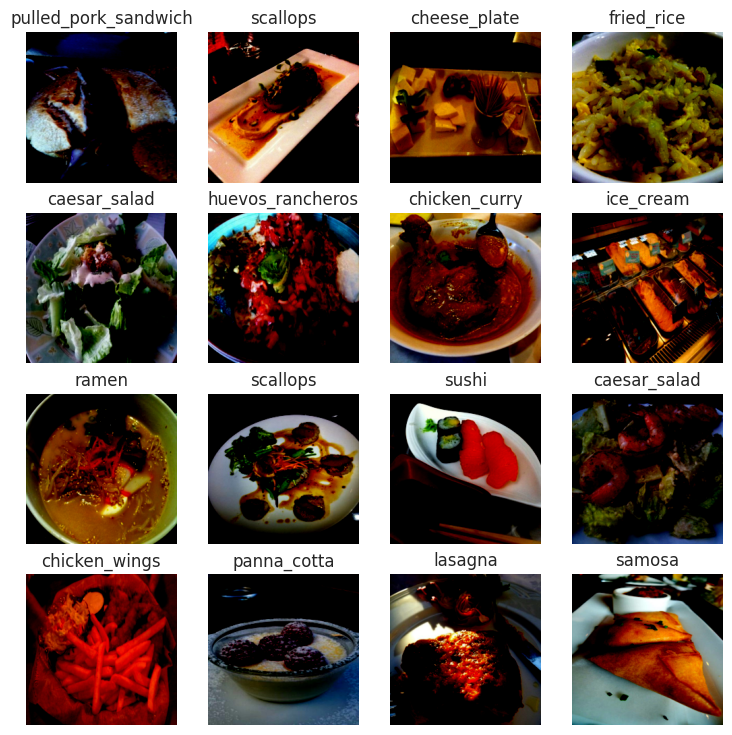

In [4]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
class_names = train_data.classes
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False);

### 1.3. Prepare Dataloader
Now, in the cell below implement the DataLoader function for the train and test data. You then have to print the length of the train and test dataloaders.

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

### YOUR CODE STARTS HERE ###

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

### YOUR CODE ENDS HERE ###



print(f"Length of train dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_loader)} batches of {BATCH_SIZE}")

Length of train dataloader: 2368 batches of 32
Length of test dataloader: 790 batches of 32


### 1.4. VGG16 Architecture
Now, create a model class and implement the VGG16 architecture. The architecture layer is as follows :
![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*6VP81rFoLWp10FcG)
![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*0M8CobXpNwFDCmOQ)

VGG16 takes input tensor size as 224, 244 with 3 RGB channel. It has 13 convolutional layers, 5 Max Pooling layers, and 3 Dense layers which sum up to 21 layers.



Implement the model class in the given cell below. DONOT change the class name as that would be required in the next cell.

In [6]:

### REPLACE WITH YOUR OWN CODE . DONOT CHANGE THE CLASS NAME ###

class VGG16(nn.Module):
    def __init__(self, num_classes=101):
        super(VGG16, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

### 1.5. Model Training
Train the above defined model using the following configurations :    
*   #epochs = 5
*   learning rate = 0.05
* loss = cross entropy
* optimizer = Adam\
After training, save the model with the name : ```food101_vgg16_model.pt```



##### When Trained on learning rate = 0.05

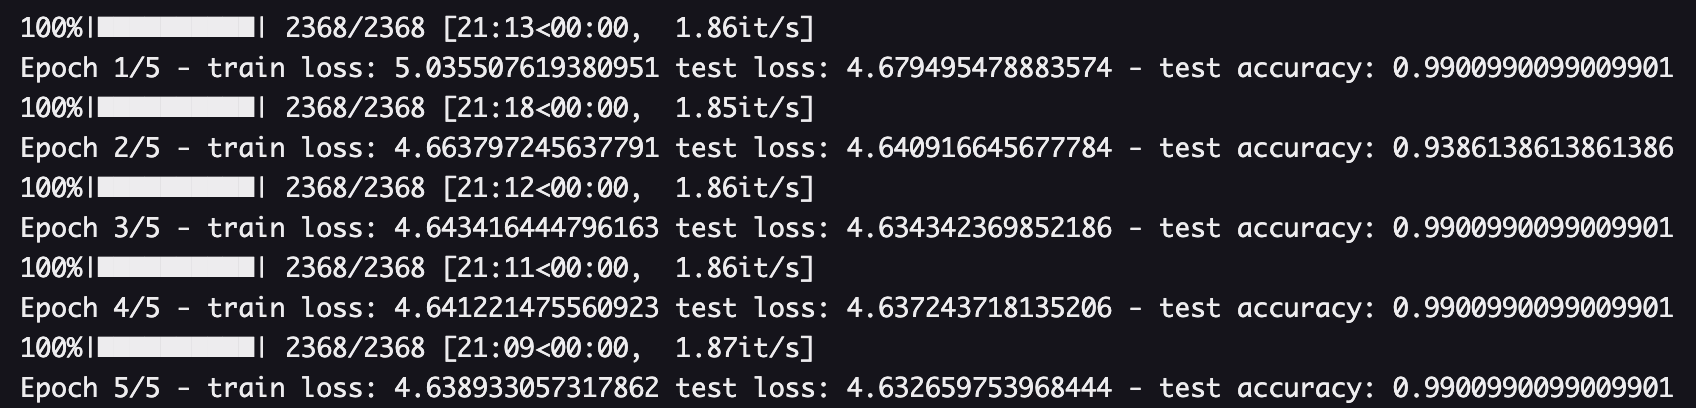
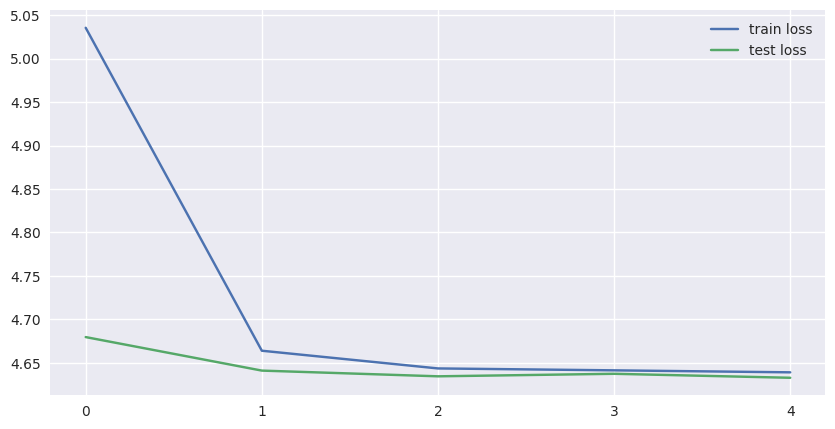

* The accuracy is very low. Tried different learning rates to get decent accuracy.

100%|██████████| 2368/2368 [21:41<00:00,  1.82it/s]


Epoch 1/5 - train loss: 4.014793226445043 test loss: 3.3248665573476237 - test accuracy: 20.304950495049503


100%|██████████| 2368/2368 [21:41<00:00,  1.82it/s]


Epoch 2/5 - train loss: 3.2324368922492943 test loss: 2.7875913119014304 - test accuracy: 30.574257425742573


100%|██████████| 2368/2368 [21:42<00:00,  1.82it/s]


Epoch 3/5 - train loss: 2.6927235077160434 test loss: 2.3508011476997335 - test accuracy: 40.45940594059406


100%|██████████| 2368/2368 [21:43<00:00,  1.82it/s]


Epoch 4/5 - train loss: 2.280002179530424 test loss: 2.053333132034993 - test accuracy: 46.53069306930693


100%|██████████| 2368/2368 [21:42<00:00,  1.82it/s]


Epoch 5/5 - train loss: 1.9425974984124705 test loss: 1.8533807066422474 - test accuracy: 51.48910891089109


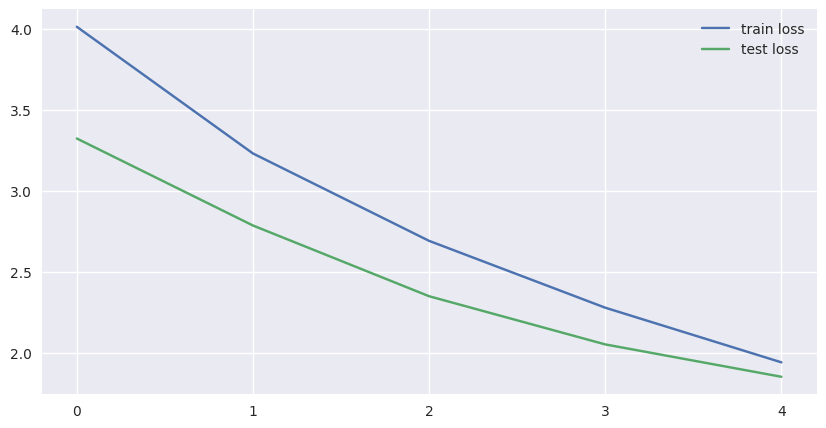

In [7]:
num_classes = 101
num_epochs = 5
device = torch.device(
    'mps' if torch.backends.mps.is_available() else 
    'cuda' if torch.cuda.is_available() else 'cpu'
)

def initialize_weights(model):
    for module in model.modules():
        if isinstance(module, nn.Conv2d):
            nn.init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.BatchNorm2d):
            nn.init.constant_(module.weight, 1)
            nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.Linear):
            nn.init.normal_(module.weight, 0, 0.009)
            nn.init.constant_(module.bias, 0)

model = VGG16(num_classes)
initialize_weights(model)

# If gpu device count is greater than 1, use DataParallel
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model, device_ids=[0, 1]) # Try parallelism

model = model.to(device)

### YOUR CODE STARTS HERE ###
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

scratch_train_losses = []
scratch_test_losses = []
scratch_test_accuracy = []

for epoch in range(num_epochs):
    # Training loop
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scratch_train_losses.append(running_loss/len(train_loader))
    print(f"Epoch {epoch+1}/{num_epochs} - train loss: {running_loss/len(train_loader)}", end=" ")

    # Testing loop
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    scratch_test_losses.append(running_loss/len(test_loader))
    scratch_test_accuracy.append(100 * correct / total)
    print(f"test loss: {running_loss/len(test_loader)} - test accuracy: {100 * correct / total}")

# Plot the training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(scratch_train_losses, label='train loss')
plt.plot(scratch_test_losses, label='test loss')
plt.xticks(range(num_epochs))
plt.legend()
plt.show()

# Save the model
torch.save(model.state_dict(), "food101_vgg16_model.pt")

### YOUR CODE ENDS HERE ###


### 1.6. Evaluate the model
Load the trained model and evaluate on the test data.

In [8]:
### YOUR CODE STARTS HERE ###
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")

### YOUR CODE ENDS HERE ###

Testing: 100%|██████████| 790/790 [03:45<00:00,  3.51it/s]

Accuracy on test set: 51.49%


# Task-2 : Finetuning VGG16
In this task, you would use the concept of transfer learning to train a pretrained model of VGG16 on the Food101 dataset. You would use the pretrained model of vgg16 from the pytorch library and use a classification head having the number of classes same as given in the dataset(as like above). Use cross entropy loss and SGD optimizer to train on the training data. Report the accuracy measure of the previous model (from scratch) and this finetuned version. Prepare a graph showing the accuracy of the models.

## 2.1 Finetune workflow

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 167MB/s]
Epoch 1/5: 100%|██████████| 2368/2368 [12:19<00:00,  3.20it/s]


Epoch 1/5 - train loss: 2.4505 - test loss: 1.6356 - test accuracy: 56.72%


Epoch 2/5: 100%|██████████| 2368/2368 [12:20<00:00,  3.20it/s]


Epoch 2/5 - train loss: 1.6098 - test loss: 1.5016 - test accuracy: 60.15%


Epoch 3/5: 100%|██████████| 2368/2368 [12:23<00:00,  3.18it/s]


Epoch 3/5 - train loss: 1.0169 - test loss: 1.4072 - test accuracy: 62.19%


Epoch 4/5: 100%|██████████| 2368/2368 [12:23<00:00,  3.19it/s]


Epoch 4/5 - train loss: 0.8736 - test loss: 1.4014 - test accuracy: 62.26%


Epoch 5/5: 100%|██████████| 2368/2368 [12:24<00:00,  3.18it/s]


Epoch 5/5 - train loss: 0.7702 - test loss: 1.3957 - test accuracy: 62.30%


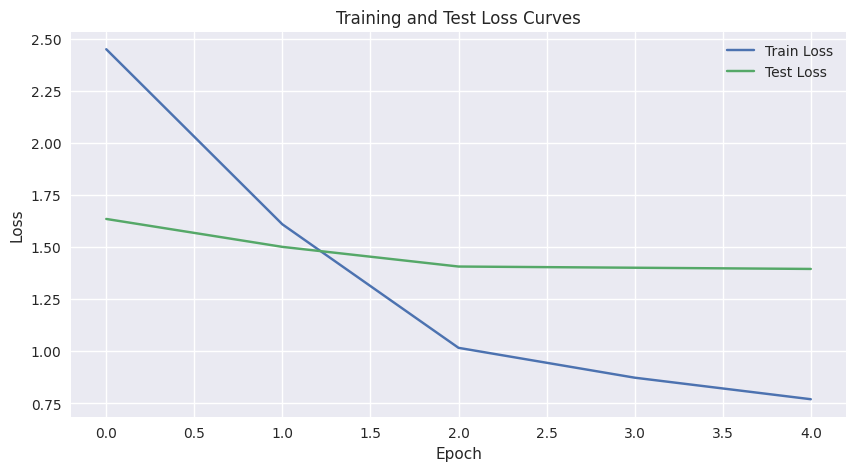

Final Accuracy on Test Set: 62.30%


In [10]:
### YOUR CODE STARTS HERE ###

device = torch.device(
    'mps' if torch.backends.mps.is_available() else 
    'cuda' if torch.cuda.is_available() else 'cpu'
)

# Load pretrained VGG16 model
pretrained_vgg16 = models.vgg16(weights="DEFAULT")

# Freeze parameters
for param in pretrained_vgg16.parameters():
    param.requires_grad = False

# Modify the classifier
num_classes = 101

# use the same classifier as the VGG16 model, but modify the last layer to output 101 classes instead of 1000
pretrained_vgg16.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes),
        )


# Initialize the weights only for the classifier
for module in pretrained_vgg16.classifier.modules():
    if isinstance(module, nn.Linear):
        nn.init.normal_(module.weight, 0, 0.0005)
        nn.init.constant_(module.bias, 0)
        

# Train the model
pretrained_vgg16 = pretrained_vgg16.to(device)
criterion_finetune = nn.CrossEntropyLoss()
optimizer_finetune = torch.optim.SGD(
    pretrained_vgg16.parameters(), lr=0.0005, momentum=0.9
)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer_finetune, step_size=2, gamma=0.1)

# Training loop
num_epochs = 5
train_losses = []
test_losses = []
test_accuracy = []

for epoch in range(num_epochs):
    # Training
    pretrained_vgg16.train()
    train_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer_finetune.zero_grad()
        outputs = pretrained_vgg16(images)
        loss = criterion_finetune(outputs, labels)
        loss.backward()
        optimizer_finetune.step()
        train_loss += loss.item() * images.size(0)
    scheduler.step()
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluation
    pretrained_vgg16.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = pretrained_vgg16(images)
            loss = criterion_finetune(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    accuracy = 100 * correct / total
    test_accuracy.append(accuracy)
    print(
        f"Epoch {epoch+1}/{num_epochs} - train loss: {train_loss:.4f} - "
        f"test loss: {test_loss:.4f} - test accuracy: {accuracy:.2f}%"
    )

# Plotting loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Curves")
plt.legend()
plt.show()

# Final accuracy
print(f"Final Accuracy on Test Set: {accuracy:.2f}%")

# Save the model
torch.save(pretrained_vgg16.state_dict(), "food101_vgg16_finetuned_model.pt")

### YOUR CODE ENDS HERE ###

## 2.1 Model Comparisions

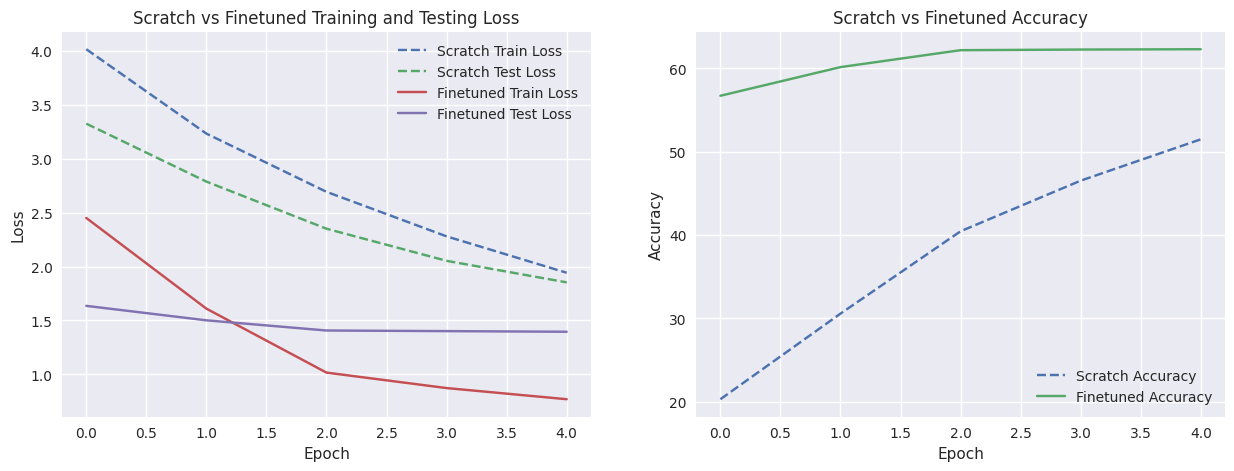

In [12]:
# Comparision

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and testing loss for the scratch model and the finetuned model
ax[0].set_title("Scratch vs Finetuned Training and Testing Loss")
ax[0].plot(scratch_train_losses, label="Scratch Train Loss", linestyle="--")
ax[0].plot(scratch_test_losses, label="Scratch Test Loss", linestyle="--")
ax[0].plot(train_losses, label="Finetuned Train Loss")
ax[0].plot(test_losses, label="Finetuned Test Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot the testing accuracy for the scratch model and the finetuned model
ax[1].set_title("Scratch vs Finetuned Accuracy")
ax[1].plot(scratch_test_accuracy, label="Scratch Accuracy", linestyle="--")
ax[1].plot(test_accuracy, label="Finetuned Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()

# Author
* Name : Yelisetty Karthikeya S M
* Roll No.: 21CS30060